## LeadTime 회귀 모델

In [1]:
import pandas as pd
from sklearn import preprocessing
df = pd.read_csv('../data/raw_postpro.csv')
df1 = df[["청구품목", 'key2', 'leadtime', '견적화폐' , '발주처']]
df1["leadtime"] = df["leadtime"].astype(int)

C:\Users\SW\AppData\Local\Temp\ipykernel_3956\1378052945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["leadtime"] = df["leadtime"].astype(int)


In [2]:
from gensim.models import FastText
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 제일 좋은 모델
X = list(df["Subject"]+ ' ' 
         + df['출고운반선']+  ' ' 
         + df['key2'] + ' ' 
         + df['Assembly'] + ' '  
         + df['견적화폐']  +  ' ' 
         + df['발주처'])

from sklearn.preprocessing import StandardScaler
# target 값
y = df['leadtime']
# StandardScaler 객체 생성
scaler = StandardScaler()

# y
# y 값 정규화
y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))

from tensorflow.keras.preprocessing.text import Tokenizer
# 텍스트 데이터를 정수 시퀀스로 변환
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [3]:
 X[1:2],sequences[1:2],

(['운전시간 대비 #2 AUX ENG TOP END O/H PARTS 본선 선적 COOLER GASKET KIT KRW HAEIN Coporation_Cheonan'],
 [[128, 50, 77, 32, 3, 188, 159, 6, 15, 1, 13, 12, 103, 16, 132, 2, 8, 9, 10]])

In [4]:
unique_words = set()
for sentence in X:
    words = sentence.split()  # 문장을 단어로 분리
    unique_words.update(words)  # 중복을 제거하고 단어를 unique_words에 추가

num_unique_words = len(unique_words)  # 고유한 단어의 개수
print("총 고유한 단어의 개수:", num_unique_words)


총 고유한 단어의 개수: 3941


In [ ]:
# tokenizer, pad_sequences scaler저장해야함

In [ ]:
# import pickle

# # sequences pkl 파일로 저장
# with open("../model/sequences.pkl", "wb") as file:
#     pickle.dump(sequences, file)

In [ ]:
# import pickle

# # tokenizer pkl 파일로 저장
# with open("../model/tokenizer.pkl", "wb") as file:
#     pickle.dump(tokenizer, file)

In [ ]:
# X[:10]

In [ ]:
# y

In [5]:
# 시퀀스 길이를 정하기 위해 X 문자열 길이 확인
lengths = [len(text) for text in X]
average_length = sum(lengths) / len(lengths)
max_length = max(lengths)

print("Average length:", average_length)
print("Max length:", max_length)

Average length: 93.61563581420286
Max length: 181


In [6]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM, Conv1D, MaxPooling1D, Dense, Flatten, Reshape, GlobalMaxPooling1D
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.preprocessing.sequence import pad_sequences

# 시퀀스 패딩
max_sequence_length = 100  # 적절한 시퀀스 길이로 설정
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 데이터 분할
X_train, X_test, y_train, y_test = \
train_test_split(padded_sequences, y_normalized, test_size=0.2, random_state=42)
# train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


# 모델 구성
model = Sequential()
model.add(Embedding(input_dim=4000, output_dim=100, input_length=max_sequence_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Reshape((-1, 64)))  # LSTM 이후에 Reshape 층 추가
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

## tokenizer, pad_sequences scaler저장해야함

In [ ]:
# import pickle

# # scaler를 pkl 파일로 저장
# with open("../model/scaler.pkl", "wb") as file:
#     pickle.dump(scaler, file)

In [7]:
X_train.shape, y_train.shape
# len(X), len(y)

((16413, 100), (16413, 1))

In [8]:
X_test.shape, y_test.shape

((4104, 100), (4104, 1))

Epoch 1/50
65/65 [==============================] - 6s 24ms/step - loss: 0.5754 - val_loss: 0.2881
Epoch 2/50
65/65 [==============================] - 1s 14ms/step - loss: 0.1954 - val_loss: 0.1881
Epoch 3/50
65/65 [==============================] - 1s 14ms/step - loss: 0.1249 - val_loss: 0.1498
Epoch 4/50
65/65 [==============================] - 1s 14ms/step - loss: 0.0901 - val_loss: 0.1156
Epoch 5/50
65/65 [==============================] - 1s 15ms/step - loss: 0.0572 - val_loss: 0.1000
Epoch 6/50
65/65 [==============================] - 1s 14ms/step - loss: 0.0423 - val_loss: 0.1045
Epoch 7/50
65/65 [==============================] - 1s 14ms/step - loss: 0.0347 - val_loss: 0.0852
Epoch 8/50
65/65 [==============================] - 1s 14ms/step - loss: 0.0303 - val_loss: 0.0832
Epoch 9/50
65/65 [==============================] - 1s 14ms/step - loss: 0.0213 - val_loss: 0.0823
Epoch 10/50
65/65 [==============================] - 1s 14ms/step - loss: 0.0164 - val_loss: 0.0777
Epoch 11/

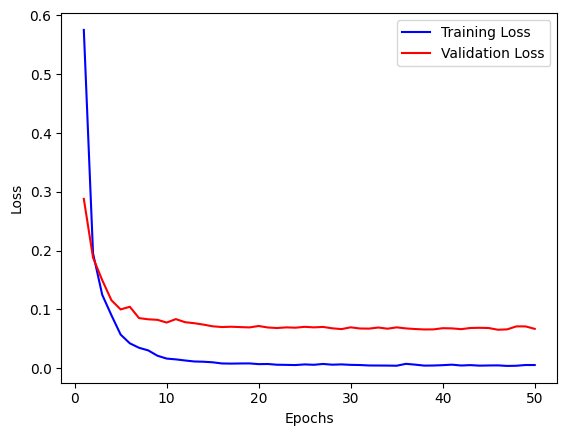

In [9]:
import matplotlib.pyplot as plt

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test))

# 손실 값 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 에포크 수
epochs = range(1, len(train_loss) + 1)

# 학습 곡선 그리기
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('learning_curve.png')  # 이미지 파일로 저장
plt.show()

In [ ]:
# # 모델 저장
# model.save("../model/model_regression.h5")

## 검증 데이터의 손실값이 더 많은 것으로 보아 과적합 된것으로 판단됨

In [10]:
y_pred = model.predict(X_test)

# 예측 결과 출력
print("Predicted values:")
print(y_pred[:30])

print("Actual values:")
print(y_test[:30])

for i in range(30):
    print(y_pred[i][0], y_test[i])

129/129 [==============================] - 1s 3ms/step
Predicted values:
[[ 0.9947935 ]
 [ 0.09158431]
 [-0.28096107]
 [ 0.4948055 ]
 [ 1.9485922 ]
 [-0.4697146 ]
 [ 0.30821857]
 [ 1.1284411 ]
 [-0.8363024 ]
 [-0.87366456]
 [ 2.1099527 ]
 [ 0.91202396]
 [-0.34935185]
 [-0.78866863]
 [-0.17286333]
 [ 1.000681  ]
 [-0.7546332 ]
 [-0.3623545 ]
 [-1.0193312 ]
 [-0.38985014]
 [-0.91480035]
 [ 0.76380646]
 [-0.9551147 ]
 [-0.8652948 ]
 [ 4.392337  ]
 [-0.9587961 ]
 [ 1.0434673 ]
 [ 0.4024144 ]
 [ 0.21908902]
 [ 0.9116117 ]]
Actual values:
[[ 0.99154998]
 [ 0.03041752]
 [-0.28517822]
 [ 0.46077534]
 [ 2.06744453]
 [-0.4716666 ]
 [ 0.34601325]
 [ 1.14934785]
 [-0.9450602 ]
 [-0.93071494]
 [ 1.70881301]
 [ 1.10631206]
 [-0.3999403 ]
 [-0.8733339 ]
 [-0.24214243]
 [ 0.99154998]
 [-0.78726234]
 [-0.48601186]
 [-1.00244125]
 [-0.42863082]
 [-1.04547703]
 [ 0.80506159]
 [-1.04547703]
 [-0.88767916]
 [ 4.21923362]
 [-1.08851281]
 [ 0.91982368]
 [ 0.41773955]
 [ 0.21690591]
 [ 0.08779856]]
0.9947935 

In [11]:
y_pred[1][0]

0.09158431

In [12]:
y_test

array([[ 0.99154998],
       [ 0.03041752],
       [-0.28517822],
       ...,
       [-1.01678651],
       [-1.08851281],
       [ 0.05910804]])

In [13]:
# 원래 스케일로 되돌리기
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

import numpy as np
y_test_arr = np.array(y_test)
y_pred_arr = np.array(y_pred)

# 값들을 비교하면서 출력합니다.
for i in range(40):
    print("Actual:", y_test_arr[i], "Predicted:", y_pred_arr[i])

Actual: [145.] Predicted: [145.2261]
Actual: [78.] Predicted: [82.2639]
Actual: [56.] Predicted: [56.293976]
Actual: [108.] Predicted: [110.37222]
Actual: [220.] Predicted: [211.71487]
Actual: [43.] Predicted: [43.136074]
Actual: [100.] Predicted: [97.36536]
Actual: [156.] Predicted: [154.5426]
Actual: [10.] Predicted: [17.581444]
Actual: [11.] Predicted: [14.976952]
Actual: [195.] Predicted: [222.96321]
Actual: [153.] Predicted: [139.45628]
Actual: [48.] Predicted: [51.526493]
Actual: [15.] Predicted: [20.901966]
Actual: [59.] Predicted: [63.829407]
Actual: [145.] Predicted: [145.63652]
Actual: [21.] Predicted: [23.274559]
Actual: [42.] Predicted: [50.620087]
Actual: [6.] Predicted: [4.822613]
Actual: [46.] Predicted: [48.70338]
Actual: [3.] Predicted: [12.109398]
Actual: [132.] Predicted: [129.12413]
Actual: [3.] Predicted: [9.299107]
Actual: [14.] Predicted: [15.560402]
Actual: [370.] Predicted: [382.06693]
Actual: [0.] Predicted: [9.042477]
Actual: [140.] Predicted: [148.61913]
Act

In [14]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.9322706754348014


batch 256
max_sequence_length = 150
R^2 Score: 0.9243755316599768

## 새로운 데이터로 확인

In [ ]:
# X = list(df["Subject"]+ ' ' +df['출고운반선']+  ' ' + df['key2'] + ' ' + df['Assembly'] + ' '  + df['견적화폐']  +  ' ' + df['발주처'])

In [ ]:
strings = ["DEO-E-210512-01", "0","COOLER", "2N4727 INSTRUMNT PANEL GP", "KRW", "HAEIN Coporation_Cheonan"]
combined_string = " ".join(strings)
combined_string

In [ ]:
combined_string = tokenizer.texts_to_sequences([combined_string])
# combined_string

In [ ]:
combined_string

In [ ]:
padded_string = pad_sequences(combined_string, maxlen=100)

In [ ]:
y_pred_test = model.predict(padded_string)

In [ ]:
y_pred_test = scaler.inverse_transform(y_test)

In [ ]:
y_pred_test

In [ ]:
import numpy as np
y_pred_test = np.array(y_pred_test)

In [ ]:
y_pred_test

In [ ]:
strings = ["DEO-E-210512-01", "0", "COOLER", "2N4727 INSTRUMNT PANEL GP", "KRW", "HAEIN Coporation_Cheonan"]
combined_string = " ".join(strings)

# 문자열을 정수 시퀀스로 변환
combined_sequence = tokenizer.texts_to_sequences([combined_string])

# 시퀀스 패딩
combined_padded_sequence = pad_sequences(combined_sequence, maxlen=100)

# 예측
y_pred = model.predict(combined_padded_sequence)

In [ ]:
y_pred_test = scaler.inverse_transform(y_pred)

In [ ]:
y_pred_test[0][0]

In [ ]:
import tensorflow as tf

print(tf.__version__)

In [ ]:
# y_test와 y_pred를 numpy 배열로 변환합니다.
# 정규화 하지 않은 데이터
y_test_arr = np.array(y_test)
y_pred_arr = np.array(y_pred)

# 값들을 비교하면서 출력합니다.
for i in range(50):
    print("Actual:", y_test_arr[i], "Predicted:", y_pred_arr[i])

In [ ]:
# y_test와 y_pred를 numpy 배열로 변환합니다.
# 정규화 한 데이터

# 원래 스케일로 되돌리기
# y_test = scaler.inverse_transform(y_test)
# y_pred = scaler.inverse_transform(y_pred)

# y_test_arr = np.array(y_test)
# y_pred_arr = np.array(y_pred)

# 값들을 비교하면서 출력합니다.
for i in range(40):
    print("Actual:", y_test_arr[i], "Predicted:", y_pred_arr[i])

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

In [ ]:
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)